## California Safe Cosmetics Program

The purpose of using the California Safe Cosmetics Program (CSCP) dataset from the California Department of Public Health (CDPH) is to identify potentially hazardous ingredients in cosmetic products sold in California. This hazardous subset will then help me isolate products that have potentially harmful ingredients deemed by the CSCP.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('cscpopendata.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107397 entries, 0 to 107396
Data columns (total 22 columns):
CDPHId                    107397 non-null int64
ProductName               107397 non-null object
CSFId                     75148 non-null float64
CSF                       74724 non-null object
CompanyId                 107397 non-null int64
CompanyName               107397 non-null object
BrandName                 107186 non-null object
PrimaryCategoryId         107397 non-null int64
PrimaryCategory           107397 non-null object
SubCategoryId             107397 non-null int64
SubCategory               107397 non-null object
CasId                     107397 non-null int64
CasNumber                 101268 non-null object
ChemicalId                107397 non-null int64
ChemicalName              107397 non-null object
InitialDateReported       107397 non-null object
MostRecentDateReported    107397 non-null object
DiscontinuedDate          12545 non-null object
ChemicalCreated

**Data Cleaning**

In [38]:
#format strings in columns to ensure all cells have same formatting
df['CompanyName'] = df['CompanyName'].str.upper().str.strip()
df['BrandName'] = df['BrandName'].str.upper().str.strip()
df['ChemicalName'] = df['ChemicalName'].str.upper().str.strip()
df['PrimaryCategory'] = df['PrimaryCategory'].str.upper().str.strip()
df['ProductName'] = df['ProductName'].str.upper().str.strip()

Checking for different naming conventions under Chemical Name column

In [72]:
#checks for different naming conventions
# df['ChemicalName'].unique()

In [71]:
#remove paranthesis in ChemicalName
df['ChemicalNameNoParenth'] = df['ChemicalName'].str.replace(r"\(.*\)","")
df['ChemicalNameNoParenth'] = df['ChemicalNameNoParenth'].str.strip()
# df['ChemicalNameNoParenth'].unique()

Classify/tag companies that are Korean or Western

In [41]:
#beauty dataframe- large Western and Korean companies
beauty_df = df[(df['CompanyName'] == 'AMOREPACIFIC US INC.') 
               | (df['CompanyName'] == 'MEMEBOX CORPORATION') 
               | (df['CompanyName'] == 'CLARINS S.A.')
               | (df['CompanyName'] == 'ESTEE LAUDER INC.')
               | (df['CompanyName'] == "L'OREAL USA")
               | (df['CompanyName'] == 'LA PRAIRIE, INC.')
               | (df['CompanyName'] == 'LG HOUSEHOLD & HEALTH CARE AMERICA INC.')]

#check hazardous chemicals that now appear in this subset
beauty_df['ChemicalNameNoParenth'].unique()

array(['TITANIUM DIOXIDE', 'COFFEE', 'SILICA, CRYSTALLINE',
       'CARBON BLACK', 'TALC', 'BENZOPHENONE', 'SAFROLE', 'ACETALDEHYDE',
       'BENZO[A]PYRENE', 'ESTRAGOLE', 'BENZ[A]ANTHRACENE', 'BETA-MYRCENE',
       'METHYLEUGENOL', 'CAFFEIC ACID', '2-PROPYLENEACROLEIN',
       'GINKGO BILOBA EXTRACT', 'COCAMIDE DEA',
       'BUTYLATED HYDROXYANISOLE', 'ALOE VERA, WHOLE LEAF EXTRACT'],
      dtype=object)

Remove categories that are of no concern, the primary focus for this project is skincare

In [19]:
#identify the categories in the dataset
beauty_df['PrimaryCategory'].unique()

array(['MAKEUP PRODUCTS (NON-PERMANENT)', 'FRAGRANCES',
       'SKIN CARE PRODUCTS', 'NAIL PRODUCTS', 'BATH PRODUCTS',
       'HAIR COLORING PRODUCTS', 'SUN-RELATED PRODUCTS',
       'HAIR CARE PRODUCTS (NON-COLORING)', 'SHAVING PRODUCTS',
       'PERSONAL CARE PRODUCTS'], dtype=object)

In [61]:
#create new column that classifies Korean/Western products
beauty_df['Korean/Western'] = ['KOREAN' if val == 'AMOREPACIFIC US INC.' or val == 'MEMEBOX CORPORATION' or val == 'LG HOUSEHOLD & HEALTH CARE AMERICA INC.' else 'WESTERN' for val in beauty_df['CompanyName']]
beauty_df['BrandNameNoDupes'] = beauty_df['BrandName'].copy()


#replace inconsistent brand naming conventions
replace_val = {'CLARINS PARIS': 'CLARINS-PARIS', 
               'CLARINS': 'CLARINS-PARIS', 
               'LOREAL': "L'OREAL", 
               "L'OREAL PROFESSIONNEL": "L'OREAL", 
               'LA ROCHE POSAY':'LA ROCHE-POSAY',
               'ARITUAM': 'ARITAUM'}
beauty_df = beauty_df.replace({'BrandNameNoDupes': replace_val})

#drop rows that contain DO NOT USE and 231170002
beauty_df2 = beauty_df[(beauty_df.BrandName != "(DO NOT USE)") 
                       & (beauty_df.BrandName != '231170002') 
                       & (beauty_df.PrimaryCategory != 'FRAGRANCES')
                       & (beauty_df.PrimaryCategory != 'NAIL PRODUCTS')
                       & (beauty_df.PrimaryCategory != 'BATH PRODUCTS')
                       & (beauty_df.PrimaryCategory != 'HAIR COLORING PRODUCTS')
                       & (beauty_df.PrimaryCategory != 'HAIR CARE PRODUCTS (NON-COLORING)')
                       & (beauty_df.PrimaryCategory != 'SHAVING PRODUCTS')
                       & (beauty_df.PrimaryCategory != 'MAKEUP PRODUCTS (NON-PERMANENT)')
                       & (beauty_df.PrimaryCategory != 'PERSONAL CARE PRODUCTS')]

#beauty_df2['BrandNameNoDupes'].unique()
#beauty_df2.head()
beauty_df2[['ProductName', 'CDPHId', 'ChemicalName']].head()

,ProductName,CDPHId,ChemicalName
4647,YSL BABY DOLL SPARKLING BODY POWDER,1384,TITANIUM DIOXIDE
5242,YSL CINEMA VELVETY BODY LOTION,1690,TITANIUM DIOXIDE
5918,YSL AGE DEFYING NIGHT CREME,1842,TITANIUM DIOXIDE
5923,YSL REJUVENATING MULTI-PROTECTION CREME,1844,TITANIUM DIOXIDE
5924,YSL INTENSIVE ANTI-WRINKLE CREME,1845,TITANIUM DIOXIDE


In [21]:
#create new table
beauty_df3 = beauty_df2[['CDPHId','ProductName', 'CompanyName', 'BrandNameNoDupes', 'PrimaryCategory', 'ChemicalNameNoParenth', 'Korean/Western','ChemicalCount']]
beauty_df3.head()

#sanity check for unique count of Product IDs
#beauty_df3['CDPHId'].nunique()

,CDPHId,ProductName,CompanyName,BrandNameNoDupes,PrimaryCategory,ChemicalNameNoParenth,Korean/Western,ChemicalCount
4647,1384,YSL BABY DOLL SPARKLING BODY POWDER,L'OREAL USA,YSL,SKIN CARE PRODUCTS,TITANIUM DIOXIDE,WESTERN,1
5242,1690,YSL CINEMA VELVETY BODY LOTION,L'OREAL USA,YSL,SKIN CARE PRODUCTS,TITANIUM DIOXIDE,WESTERN,1
5918,1842,YSL AGE DEFYING NIGHT CREME,L'OREAL USA,YSL,SKIN CARE PRODUCTS,TITANIUM DIOXIDE,WESTERN,1
5923,1844,YSL REJUVENATING MULTI-PROTECTION CREME,L'OREAL USA,YSL,SKIN CARE PRODUCTS,TITANIUM DIOXIDE,WESTERN,1
5924,1845,YSL INTENSIVE ANTI-WRINKLE CREME,L'OREAL USA,YSL,SKIN CARE PRODUCTS,TITANIUM DIOXIDE,WESTERN,1


**Table and Graph Creations**

Create a table that gives a high level summary of the breakout of potentially hazardous chemicals between Korean/Western companies

In [42]:
#group by Korean/Western and Chemical Name, count by unique Product IDs
groups = beauty_df3.groupby(['Korean/Western','ChemicalNameNoParenth']).nunique()['CDPHId']
beauty_df_final = groups.reset_index()

#rename column
beauty_df_final = beauty_df_final.rename(columns={'ChemicalNameNoParenth': 'Chemical Name','CDPHId': '# of Instances'})

#create final table
beauty_df_final_count = beauty_df_final[['Korean/Western', 'Chemical Name', '# of Instances']]
beauty_df_final_count = beauty_df_final_count.sort_values(by=['# of Instances'], ascending=False)
beauty_df_final_count

,Korean/Western,Chemical Name,# of Instances
12,WESTERN,TITANIUM DIOXIDE,383
4,KOREAN,TITANIUM DIOXIDE,94
6,WESTERN,BENZOPHENONE,51
3,KOREAN,GINKGO BILOBA EXTRACT,13
9,WESTERN,COFFEE,6
0,KOREAN,"ALOE VERA, WHOLE LEAF EXTRACT",5
2,KOREAN,CAFFEIC ACID,2
1,KOREAN,BUTYLATED HYDROXYANISOLE,1
5,WESTERN,ACETALDEHYDE,1
7,WESTERN,BENZO[A]PYRENE,1


Check hazardous ingredients in subset

In [28]:
ingredients = beauty_df_final_count['Chemical Name'].unique()
ingredients_proper = [string.title() for string in ingredients]
ingredients_proper

['Titanium Dioxide',
 'Benzophenone',
 'Ginkgo Biloba Extract',
 'Coffee',
 'Aloe Vera, Whole Leaf Extract',
 'Caffeic Acid',
 'Butylated Hydroxyanisole',
 'Acetaldehyde',
 'Benzo[A]Pyrene',
 'Benz[A]Anthracene',
 'Estragole',
 'Safrole']

Create a graph that shows a breakout of hazardous chemicals by Korean and Western skincare

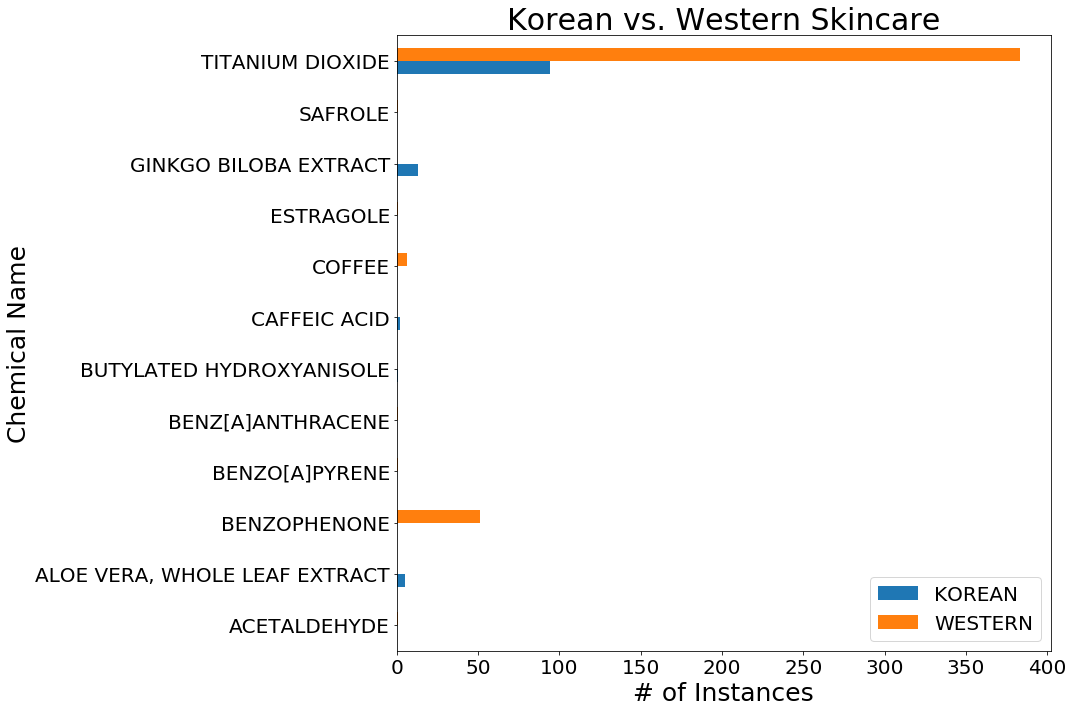

In [73]:
#Plot datapoints
ax = beauty_df_final_count.groupby(['Chemical Name', 'Korean/Western']).sum()['# of Instances'].unstack().plot(kind='barh', stacked=False, figsize=[15,10])
ax.set_xlabel('# of Instances', fontsize=25)
ax.set_ylabel('Chemical Name', fontsize=25)
ax.set_title('Korean vs. Western Skincare', fontsize=30)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower right', fontsize=20)
plt.tight_layout()

plt.savefig('images/Chem.png')

Create a graph that visualizes what the count of other chemicals look like apart Titanium Dioxide (since this appears to be the most prominent)

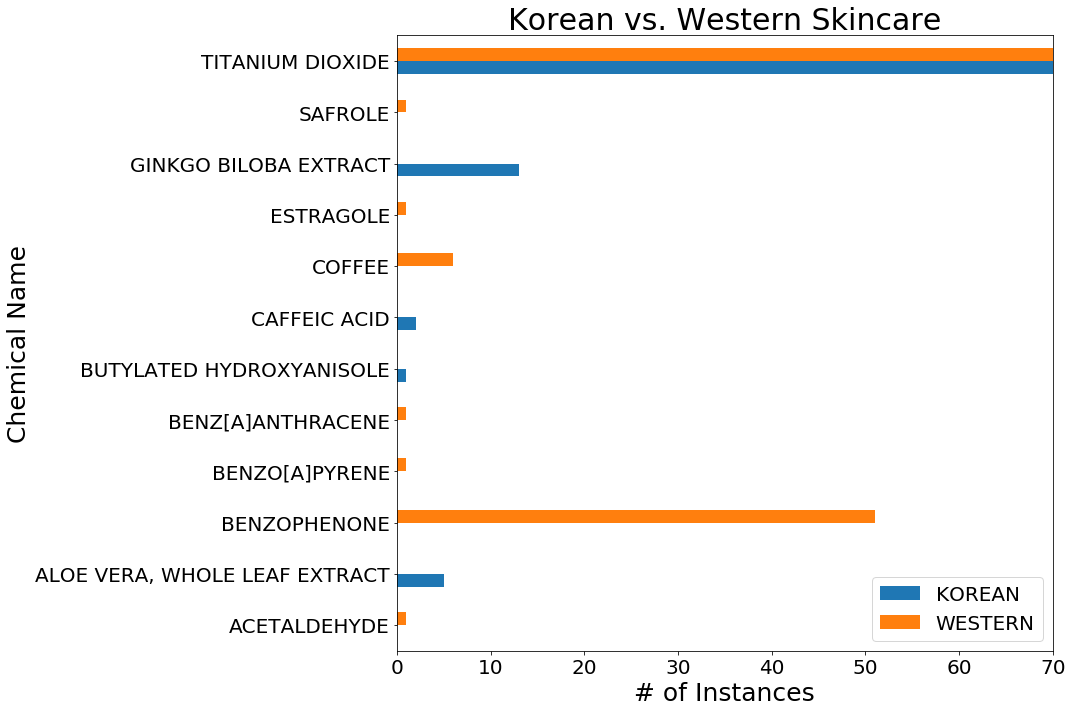

In [74]:
#Plot datapoints
ax = beauty_df_final_count.groupby(['Chemical Name', 'Korean/Western']).sum()['# of Instances'].unstack().plot(kind='barh', stacked=False, figsize=[15,10])

ax.set_xlabel('# of Instances', fontsize=25)
ax.set_ylabel('Chemical Name', fontsize=25)
ax.set_title('Korean vs. Western Skincare', fontsize=30)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower right', fontsize=20)
ax.set_xlim(0, 70)
plt.tight_layout()

plt.savefig('images/Chem_subset.png')